# Importando bibliotecas
Import the necessary libraries, including NumPy, Pandas, Seaborn, and Matplotlib.

In [1]:
# Importando bibliotecas
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()  # Set the theme for seaborn
#%matplotlib inline  # Enable inline plotting for Jupyter notebooks

# Carregando o dataframe
Load the SINASC dataframe and display its basic information.

In [2]:
# Carregando o dataframe

# Carregar o dataframe SINASC
sinasc_raw = pd.read_csv('SINASC_RO_2019.csv')

# Exibir as primeiras linhas do dataframe
sinasc_raw.head()

# Exibir informações básicas do dataframe
sinasc_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27028 entries, 0 to 27027
Data columns (total 69 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ORIGEM        27028 non-null  int64  
 1   CODESTAB      26913 non-null  float64
 2   CODMUNNASC    27028 non-null  int64  
 3   LOCNASC       27028 non-null  int64  
 4   IDADEMAE      27028 non-null  int64  
 5   ESTCIVMAE     26711 non-null  float64
 6   ESCMAE        26716 non-null  object 
 7   CODOCUPMAE    24121 non-null  float64
 8   QTDFILVIVO    25455 non-null  float64
 9   QTDFILMORT    24930 non-null  float64
 10  CODMUNRES     27028 non-null  int64  
 11  GESTACAO      25796 non-null  object 
 12  GRAVIDEZ      26949 non-null  object 
 13  PARTO         26979 non-null  object 
 14  CONSULTAS     27028 non-null  int64  
 15  DTNASC        27028 non-null  object 
 16  HORANASC      27007 non-null  float64
 17  SEXO          27024 non-null  object 
 18  APGAR1        26932 non-nu

# GroupBy: Dividir, Aplicar, Combinar (Split, Apply, Combine)
Explain the concept of GroupBy in Pandas and demonstrate its usage with examples.

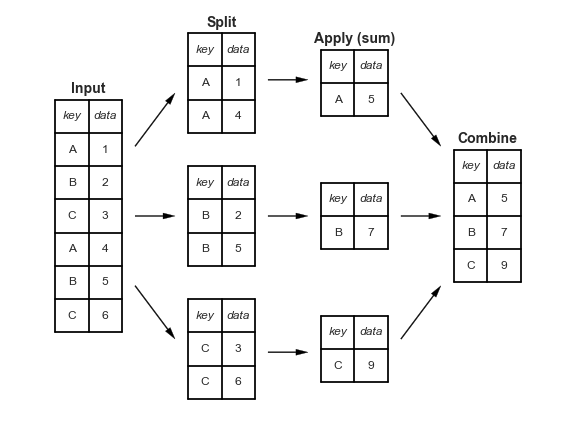

In [3]:
# GroupBy: Dividir, Aplicar, Combinar (Split, Apply, Combine)

# Exemplo de uso do GroupBy para calcular a média da idade das mães por escolaridade
sinasc_1 = sinasc_raw[['ESCMAE', 'IDADEMAE']]
media_idade_mae = sinasc_1.groupby('ESCMAE').mean()
media_idade_mae

# Exemplo de uso do GroupBy para contar o número de nascimentos por data de nascimento
contagem_nascimentos = sinasc_raw.groupby('DTNASC')['IDADEMAE'].count()
contagem_nascimentos

# Exemplo de uso do GroupBy para calcular a média da idade das mães por data de nascimento
media_idade_mae_dtnasc = sinasc_raw.groupby('DTNASC')['IDADEMAE'].mean()
media_idade_mae_dtnasc

# Exemplo de uso do GroupBy para calcular a mediana da idade das mães e dos pais por escolaridade
sinasc_2 = sinasc_raw[['ESCMAE', 'IDADEMAE', 'IDADEPAI']]
mediana_idade = sinasc_2.groupby('ESCMAE').median()
mediana_idade

# Exemplo de uso do GroupBy para calcular a amplitude da idade das mães por escolaridade
def amplitude(array):
    return array.max() - array.min()

amplitude_idade_mae = sinasc_2.groupby('ESCMAE')['IDADEMAE'].agg(amplitude)
amplitude_idade_mae

# Exemplo de uso do GroupBy para calcular várias estatísticas da idade das mães por escolaridade
estatisticas_idade_mae = sinasc_2.groupby('ESCMAE')['IDADEMAE'].agg(['min', 'max', 'mean', 'median', amplitude])
estatisticas_idade_mae

,min,max,mean,median,amplitude
ESCMAE,,,,,
1 a 3 anos,12,45,28.430233,28.0,33
12 anos ou mais,16,51,29.548119,29.0,35
4 a 7 anos,11,47,24.604412,24.0,36
8 a 11 anos,12,53,25.150387,24.0,41
Nenhuma,14,52,31.575000,33.0,38


# Estrutura do Groupby
Show the structure of GroupBy and how to use it to perform various aggregations.

In [4]:
# Estrutura do Groupby

# Exibir a estrutura do GroupBy
grouped = sinasc_1.groupby('ESCMAE')
grouped

# Calcular a média da idade das mães por escolaridade
media_idade_mae = grouped.mean()
media_idade_mae

# Contar o número de nascimentos por escolaridade
contagem_nascimentos = grouped.size()
contagem_nascimentos

# Calcular a mediana da idade das mães e dos pais por escolaridade
mediana_idade = sinasc_2.groupby('ESCMAE').median()
mediana_idade

# Calcular a amplitude da idade das mães por escolaridade
amplitude_idade_mae = sinasc_2.groupby('ESCMAE')['IDADEMAE'].agg(amplitude)
amplitude_idade_mae

# Calcular várias estatísticas da idade das mães por escolaridade
estatisticas_idade_mae = sinasc_2.groupby('ESCMAE')['IDADEMAE'].agg(['min', 'max', 'mean', 'median', amplitude])
estatisticas_idade_mae

,min,max,mean,median,amplitude
ESCMAE,,,,,
1 a 3 anos,12,45,28.430233,28.0,33
12 anos ou mais,16,51,29.548119,29.0,35
4 a 7 anos,11,47,24.604412,24.0,36
8 a 11 anos,12,53,25.150387,24.0,41
Nenhuma,14,52,31.575000,33.0,38


# Pivot table
Demonstrate how to create pivot tables using Pandas and explain their usage.

In [5]:
# Pivot table

# Criar uma tabela dinâmica para calcular a média da idade das mães por escolaridade
pivot_media_idade_mae = sinasc_1.pivot_table(values='IDADEMAE', index='ESCMAE', aggfunc='mean')
pivot_media_idade_mae

# Criar uma tabela dinâmica para calcular a contagem da idade das mães por data de nascimento
pivot_contagem_idade_mae = sinasc_raw.pivot_table(values='IDADEMAE', index='DTNASC', aggfunc='count')
pivot_contagem_idade_mae

# Criar uma tabela dinâmica para calcular a média da idade das mães por data de nascimento
pivot_media_idade_mae_dtnasc = sinasc_raw.pivot_table(values='IDADEMAE', index='DTNASC', aggfunc='mean')
pivot_media_idade_mae_dtnasc

# Criar uma tabela dinâmica para calcular a mediana da idade das mães e dos pais por escolaridade
pivot_mediana_idade = sinasc_2.pivot_table(values=['IDADEMAE', 'IDADEPAI'], index='ESCMAE', aggfunc='median')
pivot_mediana_idade

# Criar uma tabela dinâmica para calcular a amplitude da idade das mães por escolaridade
pivot_amplitude_idade_mae = sinasc_2.pivot_table(values='IDADEMAE', index='ESCMAE', aggfunc=amplitude)
pivot_amplitude_idade_mae

# Criar uma tabela dinâmica para calcular várias estatísticas da idade das mães por escolaridade
pivot_estatisticas_idade_mae = sinasc_2.pivot_table(values='IDADEMAE', index='ESCMAE', aggfunc=['min', 'max', 'mean', 'median', amplitude])
pivot_estatisticas_idade_mae

,min,max,mean,median,amplitude
,IDADEMAE,IDADEMAE,IDADEMAE,IDADEMAE,IDADEMAE
ESCMAE,,,,,
1 a 3 anos,12,45,28.430233,28.0,33
12 anos ou mais,16,51,29.548119,29.0,35
4 a 7 anos,11,47,24.604412,24.0,36
8 a 11 anos,12,53,25.150387,24.0,41
Nenhuma,14,52,31.575000,33.0,38


# Método `aggregate()` ou `agg()`
Explain the `aggregate()` or `agg()` method in Pandas and provide examples of its usage.

In [6]:
# Método `aggregate()` ou `agg()`

# Exemplo de uso do método `aggregate()` para calcular a média da idade das mães por escolaridade
media_idade_mae_agg = sinasc_1.groupby('ESCMAE').aggregate(np.mean)
media_idade_mae_agg

# Exemplo de uso do método `agg()` para calcular a média da idade das mães por escolaridade
media_idade_mae_agg_short = sinasc_1.groupby('ESCMAE').agg(np.mean)
media_idade_mae_agg_short

# Exemplo de uso do método `aggregate()` para calcular várias estatísticas da idade das mães por escolaridade
estatisticas_idade_mae_agg = sinasc_2.groupby('ESCMAE').aggregate(['min', 'max', 'mean', 'median', amplitude])
estatisticas_idade_mae_agg

# Exemplo de uso do método `agg()` para calcular várias estatísticas da idade das mães por escolaridade
estatisticas_idade_mae_agg_short = sinasc_2.groupby('ESCMAE').agg(['min', 'max', 'mean', 'median', amplitude])
estatisticas_idade_mae_agg_short

# Exemplo de uso do método `aggregate()` para calcular a amplitude da idade das mães por escolaridade
amplitude_idade_mae_agg = sinasc_2.groupby('ESCMAE')['IDADEMAE'].aggregate(amplitude)
amplitude_idade_mae_agg

# Exemplo de uso do método `agg()` para calcular a amplitude da idade das mães por escolaridade
amplitude_idade_mae_agg_short = sinasc_2.groupby('ESCMAE')['IDADEMAE'].agg(amplitude)
amplitude_idade_mae_agg_short

# Exemplo de uso do método `aggregate()` com funções personalizadas
def custom_agg(array):
    return {
        'min': array.min(),
        'max': array.max(),
        'mean': array.mean(),
        'median': np.median(array),
        'amplitude': amplitude(array)
    }

custom_estatisticas_idade_mae = sinasc_2.groupby('ESCMAE')['IDADEMAE'].aggregate(custom_agg)
custom_estatisticas_idade_mae

C:\Users\schit\AppData\Local\Temp\ipykernel_42828\2753859211.py:4: FutureWarning: The provided callable <function mean at 0x000001EB6CD2A520> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  media_idade_mae_agg = sinasc_1.groupby('ESCMAE').aggregate(np.mean)
C:\Users\schit\AppData\Local\Temp\ipykernel_42828\2753859211.py:8: FutureWarning: The provided callable <function mean at 0x000001EB6CD2A520> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  media_idade_mae_agg_short = sinasc_1.groupby('ESCMAE').agg(np.mean)


ESCMAE
1 a 3 anos         {'min': 12, 'max': 45, 'mean': 28.430232558139...
12 anos ou mais    {'min': 16, 'max': 51, 'mean': 29.548118605860...
4 a 7 anos         {'min': 11, 'max': 47, 'mean': 24.604411764705...
8 a 11 anos        {'min': 12, 'max': 53, 'mean': 25.150387001855...
Nenhuma            {'min': 14, 'max': 52, 'mean': 31.575, 'median...
Name: IDADEMAE, dtype: object

# Método `apply` do GroupBy
Show how to use the `apply` method with GroupBy to perform custom operations.

In [7]:
# Método `apply` do GroupBy

# Definindo a função que retorna as *n* linhas com valor mais alto da variável *coluna*
def top(df, n=5, column='QTDFILVIVO'):
    return df.fillna(0).sort_values(by=column, ascending=False)[:n]

# Aplicando a função `top` ao dataframe agrupado por `ESCMAE`
top_nascimentos = sinasc_raw.groupby('ESCMAE').apply(top)
top_nascimentos

# Aplicando a função `top` ao dataframe agrupado por `ESCMAE` com diferentes parâmetros
top_nascimentos_custom = sinasc_raw.groupby('ESCMAE').apply(top, n=6, column='QTDFILMORT')
top_nascimentos_custom

# Exemplo de uso do método `apply` para calcular a diferença entre a idade do pai e da mãe
def diff_idade(df):
    return df['IDADEPAI'] - df['IDADEMAE']

diff_idade_pais_maes = sinasc_raw.groupby('ESCMAE').apply(lambda x: diff_idade(x))
diff_idade_pais_maes

ESCMAE           
1 a 3 anos  5         7.0
            9        11.0
            13        2.0
            84       10.0
            95        2.0
                     ... 
Nenhuma     26045     NaN
            26089     2.0
            26095    26.0
            26436     NaN
            26833     NaN
Length: 26716, dtype: float64

## Opção `as_index = False`

In [8]:
sinasc_2.groupby(['ESCMAE'], as_index = False).mean()

,ESCMAE,IDADEMAE,IDADEPAI
0,1 a 3 anos,28.430233,33.805556
1,12 anos ou mais,29.548119,32.956214
2,4 a 7 anos,24.604412,31.142111
3,8 a 11 anos,25.150387,30.028020
4,Nenhuma,31.575000,38.500000


# Mapping
Demonstrate how to use mapping in Pandas to transform data based on a dictionary.

In [9]:
# Mapping

# Definindo o mapeamento para a escolaridade da mãe
mapping = {
    'Nenhuma': 'A - Nenhuma',
    '1 a 3 anos': 'B - 1 a 3 anos',
    '4 a 7 anos': 'C - 4 a 7 anos',
    '8 a 11 anos': 'D - 8 a 11 anos',
    '12 anos ou mais': 'E - 12 anos ou mais'
}

# Aplicando o mapeamento ao dataframe
sinasc_3 = sinasc_1.set_index('ESCMAE')
sinasc_3.index = sinasc_3.index.map(mapping)

# Exibindo o resultado do mapeamento
sinasc_3.head()

# Contando o número de nascimentos por escolaridade mapeada
contagem_nascimentos_mapeada = sinasc_3.groupby(sinasc_3.index).size()
contagem_nascimentos_mapeada

# Calculando a média da idade das mães por escolaridade mapeada
media_idade_mae_mapeada = sinasc_3.groupby(sinasc_3.index).mean()
media_idade_mae_mapeada

,IDADEMAE
ESCMAE,
A - Nenhuma,31.575000
B - 1 a 3 anos,28.430233
C - 4 a 7 anos,24.604412
D - 8 a 11 anos,25.150387
E - 12 anos ou mais,29.548119


# Exemplos base real
Provide real-world examples of data analysis using the SINASC dataset.

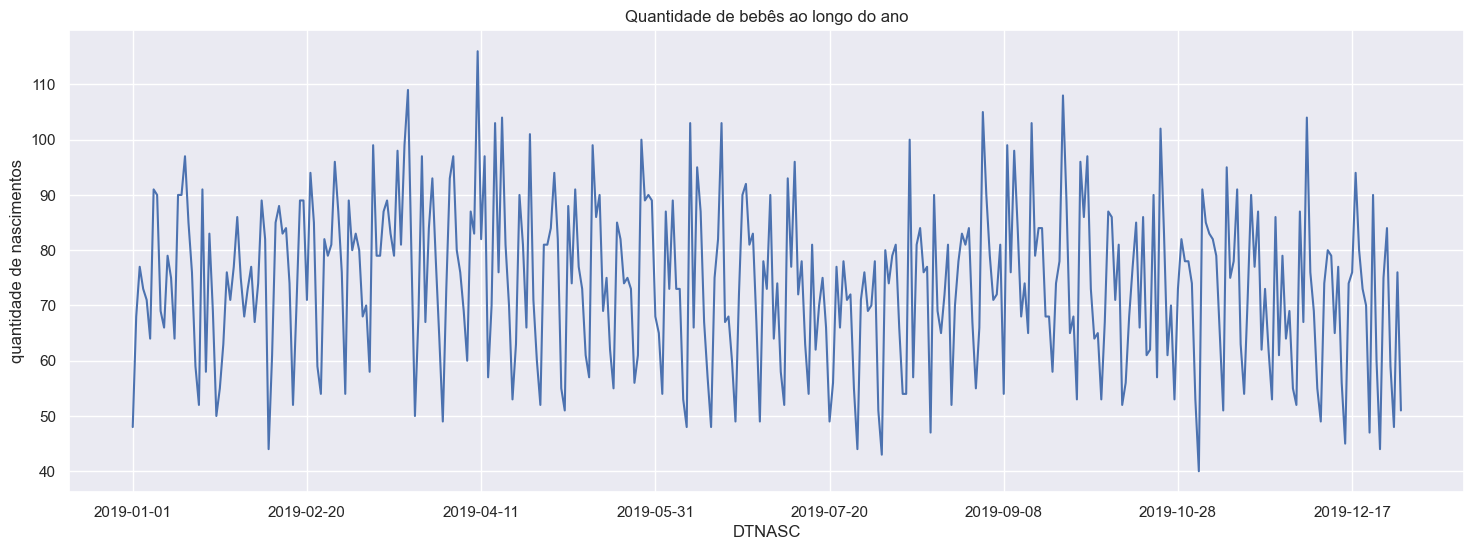

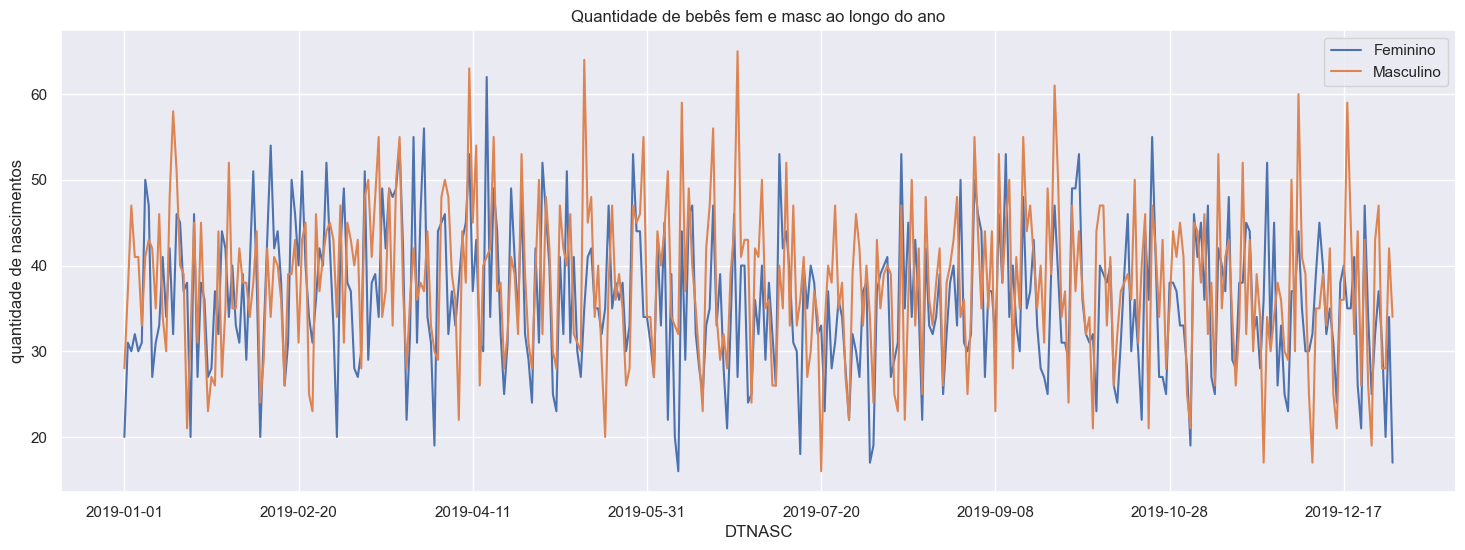

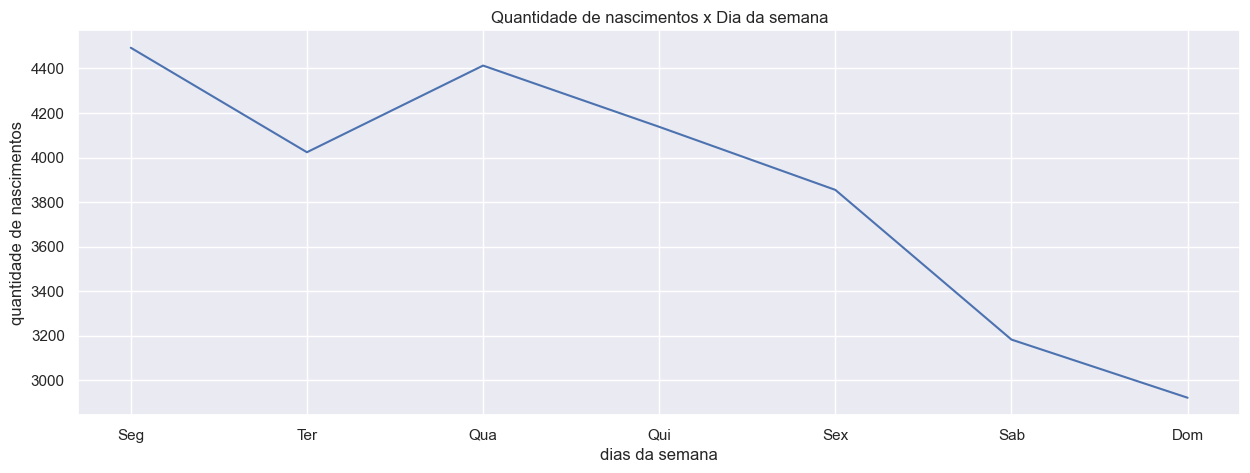

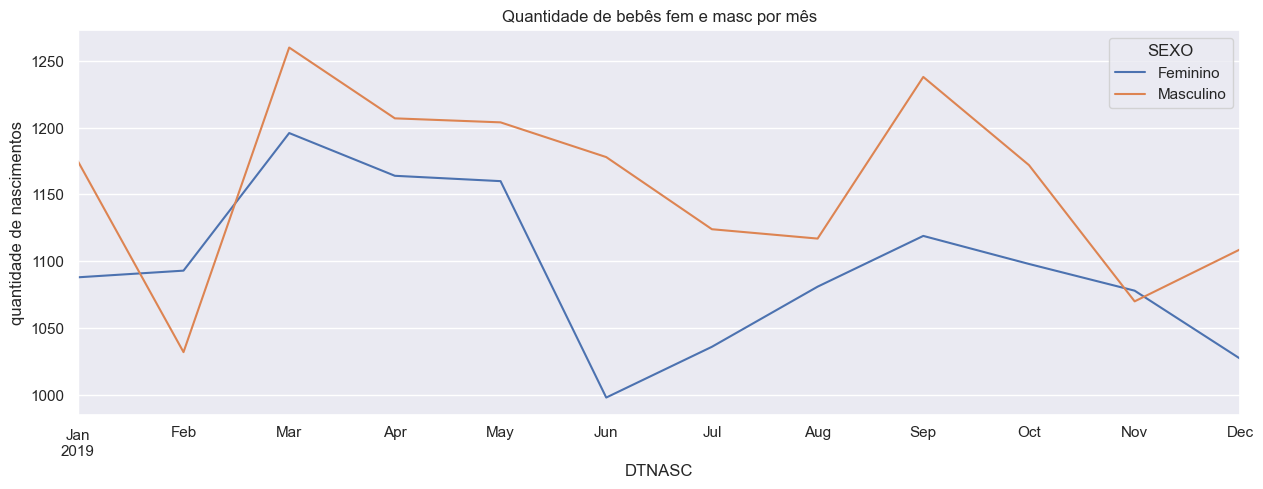

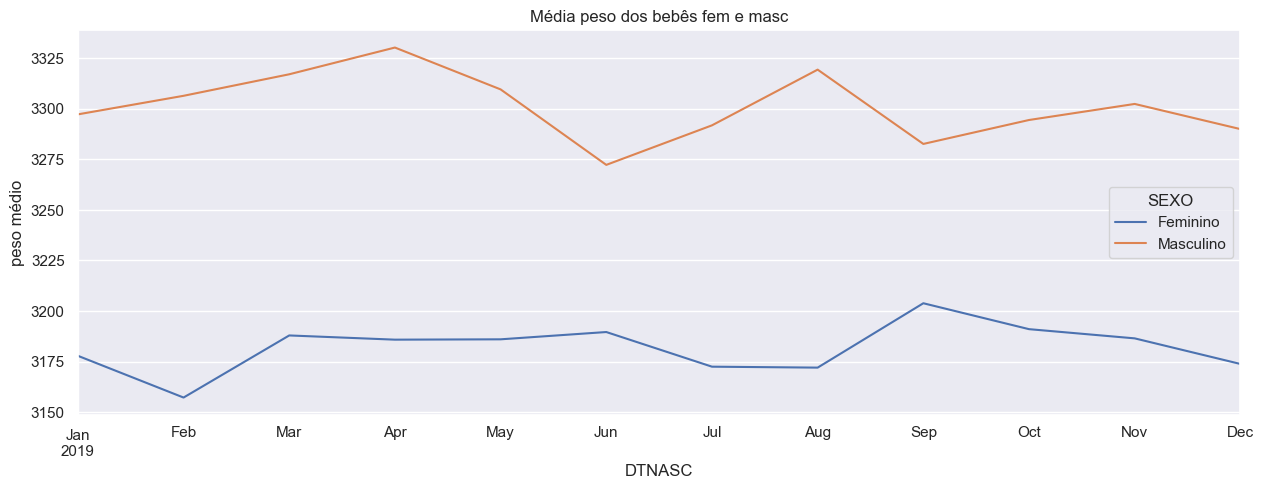

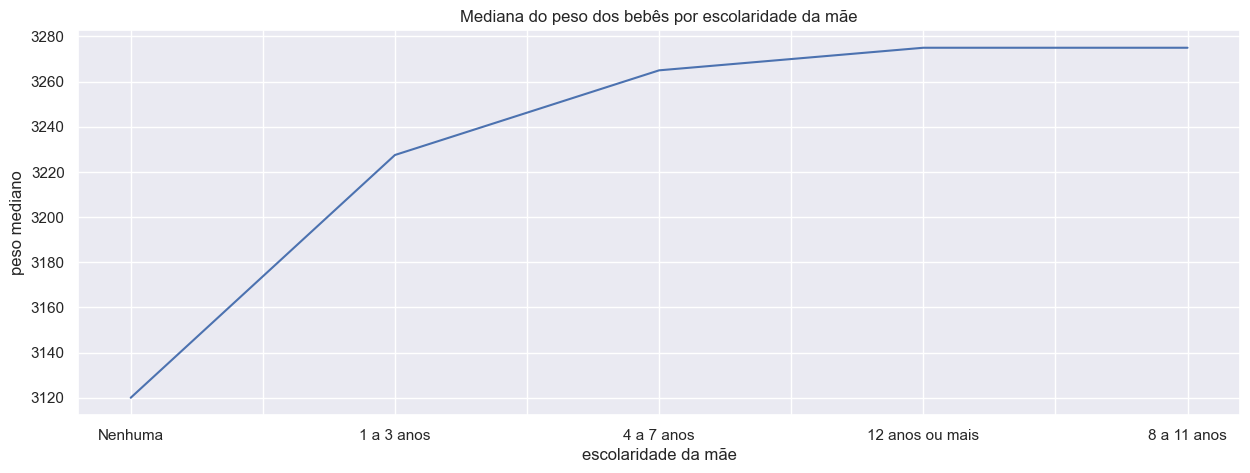

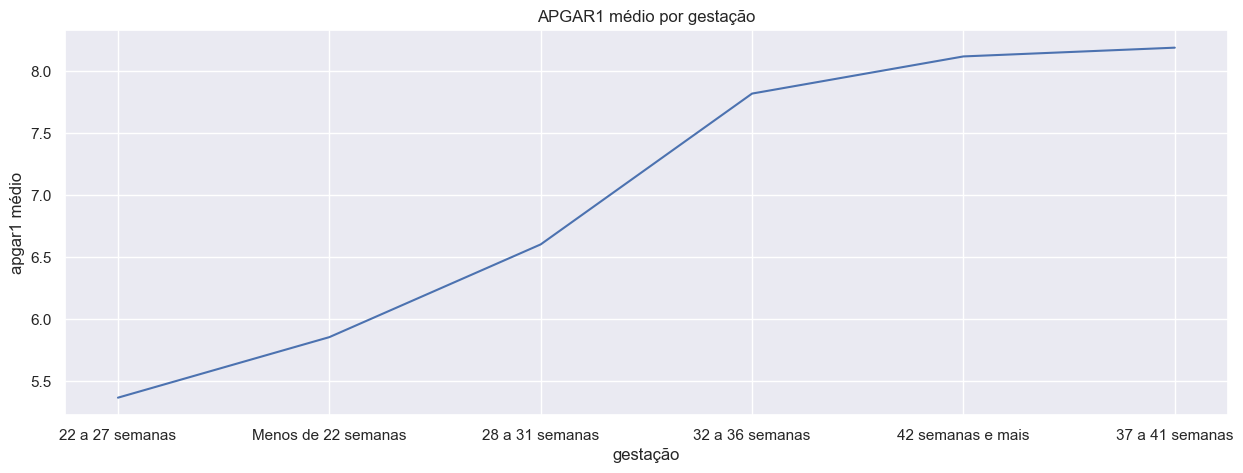

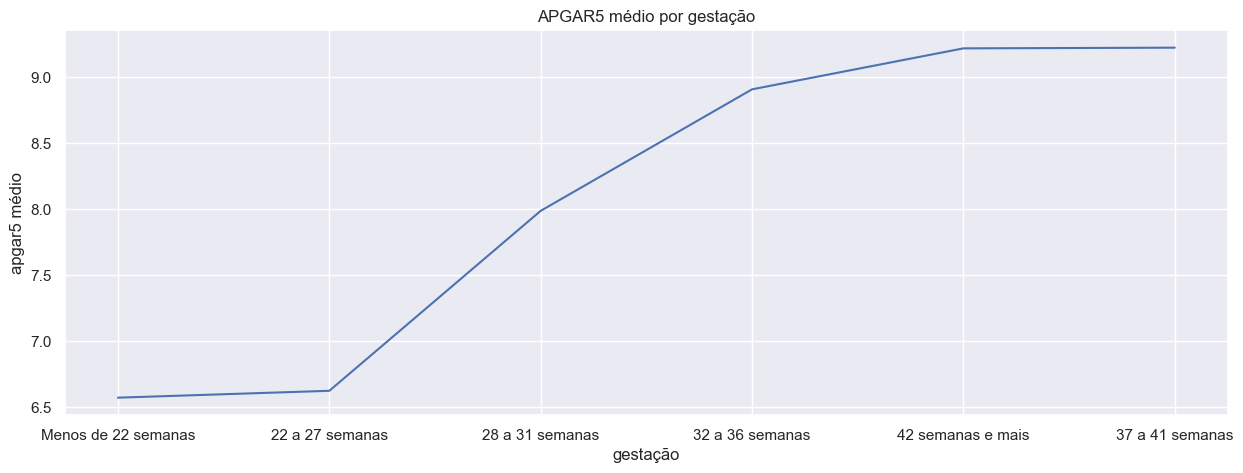

In [10]:
# Exemplos base real

# Quantidade de bebês ao longo do ano
resultado = sinasc_raw.groupby('DTNASC')['IDADEMAE'].count()
resultado.plot(figsize=[18, 6])
plt.ylabel('quantidade de nascimentos')
plt.title('Quantidade de bebês ao longo do ano')
plt.show()

# Quantidade de bebês fem e masc ao longo do ano
fem = sinasc_raw[sinasc_raw['SEXO'] == 'Feminino'].groupby('DTNASC')['IDADEMAE'].count()
masc = sinasc_raw[sinasc_raw['SEXO'] == 'Masculino'].groupby('DTNASC')['IDADEMAE'].count()
fem.plot(figsize=[18, 6], label='Feminino')
masc.plot(label='Masculino')
plt.ylabel('quantidade de nascimentos')
plt.title('Quantidade de bebês fem e masc ao longo do ano')
plt.legend()
plt.show()

# Quantidade de bebês por dia da semana
sinasc_raw['DTNASC'] = pd.to_datetime(sinasc_raw['DTNASC'])
sinasc_raw['DIADASEMANA'] = sinasc_raw['DTNASC'].dt.dayofweek
result = sinasc_raw.groupby('DIADASEMANA')['IDADEMAE'].count()
fig, ax = plt.subplots(figsize=[15, 5])
result.plot()
ax.set_xticks(result.index)
ax.set_xticklabels(['Seg', 'Ter', 'Qua', 'Qui', 'Sex', 'Sab', 'Dom'])
plt.title('Quantidade de nascimentos x Dia da semana')
plt.xlabel('dias da semana')
plt.ylabel('quantidade de nascimentos')
plt.show()

# Quantidade de bebês fem e masc por mês
sinasc_raw.groupby([sinasc_raw['DTNASC'].dt.to_period('M'), 'SEXO'])['IDADEMAE'].count().unstack().plot(figsize=[15, 5])
plt.title('Quantidade de bebês fem e masc por mês')
plt.ylabel('quantidade de nascimentos')
plt.show()

# Média peso dos bebês fem e masc
sinasc_raw.groupby([sinasc_raw['DTNASC'].dt.to_period('M'), 'SEXO'])['PESO'].mean().unstack().plot(figsize=[15, 5])
plt.title('Média peso dos bebês fem e masc')
plt.ylabel('peso médio')
plt.show()

# Escolaridade mãe (ESCMAE)
sinasc_raw.groupby('ESCMAE')['PESO'].median().sort_values().plot(figsize=[15, 5])
plt.title('Mediana do peso dos bebês por escolaridade da mãe')
plt.ylabel('peso mediano')
plt.xlabel('escolaridade da mãe')
plt.show()

# Gestacão
sinasc_raw.groupby('GESTACAO')['APGAR1'].mean().sort_values().plot(figsize=[15, 5])
plt.ylabel('apgar1 médio')
plt.xlabel('gestação')
plt.title('APGAR1 médio por gestação')
plt.show()

sinasc_raw.groupby('GESTACAO')['APGAR5'].mean().sort_values().plot(figsize=[15, 5])
plt.ylabel('apgar5 médio')
plt.xlabel('gestação')
plt.title('APGAR5 médio por gestação')
plt.show()

# Exemplos adicionais
Include additional examples to further illustrate the concepts covered in the notebook.

In [11]:
# Exemplos adicionais

# Exemplo de uso do GroupBy para calcular a média do peso dos bebês por tipo de gravidez
media_peso_gravidez = sinasc_raw.groupby('GRAVIDEZ')['PESO'].mean()
media_peso_gravidez

# Exemplo de uso do GroupBy para calcular a mediana do APGAR1 e APGAR5 por tipo de parto
mediana_apgar_parto = sinasc_raw.groupby('PARTO')[['APGAR1', 'APGAR5']].median()
mediana_apgar_parto

# Exemplo de uso do GroupBy para calcular a contagem de nascimentos por UF de residência da mãe
contagem_nascimentos_uf = sinasc_raw.groupby('munResUf')['IDADEMAE'].count()
contagem_nascimentos_uf

# Exemplo de uso do GroupBy para calcular a média da idade das mães por UF de residência
media_idade_mae_uf = sinasc_raw.groupby('munResUf')['IDADEMAE'].mean()
media_idade_mae_uf

# Exemplo de uso do GroupBy para calcular a média do peso dos bebês por UF de residência
media_peso_uf = sinasc_raw.groupby('munResUf')['PESO'].mean()
media_peso_uf

# Exemplo de uso do GroupBy para calcular a média do APGAR1 e APGAR5 por UF de residência
media_apgar_uf = sinasc_raw.groupby('munResUf')[['APGAR1', 'APGAR5']].mean()
media_apgar_uf

# Exemplo de uso do GroupBy para calcular a contagem de nascimentos por tipo de gravidez e tipo de parto
contagem_nascimentos_gravidez_parto = sinasc_raw.groupby(['GRAVIDEZ', 'PARTO'])['IDADEMAE'].count()
contagem_nascimentos_gravidez_parto

# Exemplo de uso do GroupBy para calcular a média do peso dos bebês por tipo de gravidez e tipo de parto
media_peso_gravidez_parto = sinasc_raw.groupby(['GRAVIDEZ', 'PARTO'])['PESO'].mean()
media_peso_gravidez_parto

# Exemplo de uso do GroupBy para calcular a mediana do APGAR1 e APGAR5 por tipo de gravidez e tipo de parto
mediana_apgar_gravidez_parto = sinasc_raw.groupby(['GRAVIDEZ', 'PARTO'])[['APGAR1', 'APGAR5']].median()
mediana_apgar_gravidez_parto

APGAR1  APGAR5
GRAVIDEZ        PARTO                  
Dupla           Cesáreo     8.0     9.0
                Vaginal     8.0     9.0
Tríplice e mais Cesáreo     8.0     9.0
Única           Cesáreo     8.0     9.0
                Vaginal     8.0     9.0